In [1]:
import pandas as pd
import numpy as np
import statistics
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import KFold, train_test_split, cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.utils.multiclass import type_of_target
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import tree
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, plot_confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve, auc, plot_precision_recall_curve
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier

In [2]:
bank_data = pd.read_csv("BankChurners.csv").drop(columns = ['CLIENTNUM'])

In [3]:
bank_data1 = bank_data.replace('Unknown', np.nan)

card_cate_map = {'Blue': 0, 'Silver': 1, 'Gold':2, 'Platinum': 3}
for i in range(len(bank_data1['Card_Category'])):
    for j in card_cate_map:
        if bank_data1['Card_Category'][i] == j:
            bank_data1.at[i, 'Card_Category'] = card_cate_map[j]       

#Transfer education category to integers, because there is a hierarical relationship
education_cate_map = {'Uneducated':0,'High School':1,'College':2,'Graduate':3,'Post-Graduate':4, 'Doctorate':5 }
for i in range(len(bank_data1['Education_Level'])):
    for j in education_cate_map:
        if bank_data1['Education_Level'][i] == j:
            bank_data1.at[i, 'Education_Level'] = education_cate_map[j]

income_cate_map = { 'Less than $40K': 0, '$40K - $60K': 1, '$60K - $80K': 2, '$80K - $120K':3, '$120K +': 4}
for i in range(len(bank_data1['Income_Category'])):
    for j in income_cate_map:
        if bank_data1['Income_Category'][i] == j:
            bank_data1.at[i, 'Income_Category'] = income_cate_map[j]
            
attrition_flag_map = {'Existing Customer': 0, 'Attrited Customer': 1}
for i in range(len(bank_data1['Attrition_Flag'])):
    for j in attrition_flag_map:
        if bank_data1['Attrition_Flag'][i] == j:
            bank_data1.at[i, 'Attrition_Flag'] = attrition_flag_map[j]
            
data1_pd = pd.get_dummies(bank_data1, columns = ['Gender','Marital_Status'])

data1_pd.fillna(data1_pd.mean(), inplace=True)

data1 = data1_pd.to_numpy()

In [4]:
bank_data2 = bank_data

#Transfer card category to integers, because there is a hierarical relationship
card_cate_map = {'Blue': 0, 'Silver': 1, 'Gold':2, 'Platinum': 3}
for i in range(len(bank_data2['Card_Category'])):
    for j in card_cate_map:
        if bank_data2['Card_Category'][i] == j:
            bank_data2.at[i, 'Card_Category'] = card_cate_map[j]       

#Transfer education category to integers, because there is a hierarical relationship
education_cate_map = {'Unknown':np.nan,'Uneducated':0,'High School':1,'College':2,'Graduate':3,'Post-Graduate':4, 'Doctorate':5 }
for i in range(len(bank_data2['Education_Level'])):
    for j in education_cate_map:
        if bank_data2['Education_Level'][i] == j:
            bank_data2.at[i, 'Education_Level'] = education_cate_map[j]

income_cate_map = {'Unknown': np.nan, 'Less than $40K': 0, '$40K - $60K': 1, '$60K - $80K': 2, '$80K - $120K':3, '$120K +': 4}
for i in range(len(bank_data2['Income_Category'])):
    for j in income_cate_map:
        if bank_data2['Income_Category'][i] == j:
            bank_data2.at[i, 'Income_Category'] = income_cate_map[j]
            
attrition_flag_map = {'Existing Customer': 0, 'Attrited Customer': 1}
for i in range(len(bank_data2['Attrition_Flag'])):
    for j in attrition_flag_map:
        if bank_data2['Attrition_Flag'][i] == j:
            bank_data2.at[i, 'Attrition_Flag'] = attrition_flag_map[j]
            
data2_pd = pd.get_dummies(bank_data2, columns = ['Gender','Marital_Status'])
data2_np = data2_pd.to_numpy()

In [5]:
imp_mean = IterativeImputer(random_state=0)
imp_mean.fit(data2_np)
IterativeImputer(random_state=0)
data2 = imp_mean.transform(data2_np)

In [6]:
array_sum = np.sum(data2)
array_has_nan = np.isnan(array_sum)
array_has_nan

False

In [7]:
X1 = data1[:, 1:]
y1 = data1[:, 0]

X2 = data2[:, 1:]
y2 = data2[:, 0]

# Use LabelEncoder to transform target values into integers.
label_encoder = LabelEncoder()
y1 = label_encoder.fit_transform(y1)
y2 = label_encoder.fit_transform(y2)

In [8]:
# Preprocess the data with the StandardScalar
sc_X = StandardScaler()
X1 = sc_X.fit_transform(X1)
X2 = sc_X.fit_transform(X2)

In [9]:
# Removes highly correlated data
X1 = pd.DataFrame(X1)
cor_matrix1 = X1.corr().abs()
# Select upper triangle of correlation matrix
upper_tri1 = cor_matrix1.where(np.triu(np.ones(cor_matrix1.shape),k=1).astype(bool))
to_drop1 = [column for column in upper_tri1.columns if any(upper_tri1[column] > 0.90)]
print("There are " + str(len(to_drop1)) + " columns to be dropped in the first preprocessing dataset")
X1 = X1.drop(X1.columns[to_drop1], axis = 1)

# Removes highly correlated data
X2 = pd.DataFrame(X2)
cor_matrix2 = X2.corr().abs()
# Select upper triangle of correlation matrix
upper_tri2 = cor_matrix2.where(np.triu(np.ones(cor_matrix2.shape),k=1).astype(bool))
to_drop2 = [column for column in upper_tri2.columns if any(upper_tri2[column] > 0.90)]
print("There are " + str(len(to_drop2)) + " columns to be dropped in the second preprocessing dataset")
X2 = X2.drop(X2.columns[to_drop2], axis = 1)

There are 2 columns to be dropped in the first preprocessing dataset
There are 2 columns to be dropped in the second preprocessing dataset


In [10]:
Xs = [X1, X2]
ys = [y1, y2]

In [11]:
feature_dict={}
high_low_dict = {}
    
def feature_importance(name, model, X, y):
    model.fit(X, y)
    temp_dict={}
    if name == "SVM Linear":
        importance = [abs(model.coef_[0][i]) for i in range(len(model.coef_[0]))]
    else:
        importance = model.feature_importances_
    for i,v in enumerate(importance):
        temp_dict['Feature ' + str(i)] = v
        feature_dict[name + ' Feature'] = temp_dict
    plt.bar([x for x in range(len(importance))], importance)
    plt.show()

def high_low_feature(feature_dict):
    final_dict={}
    for i in feature_dict:
        temp_dict={}
        max_key = max(feature_dict[i], key=feature_dict[i].get)
        max_value = max(feature_dict[i].values())
        temp_dict[max_key] = max_value
        final_dict[i] = temp_dict
    print(final_dict)

Using the preprocessing data 1
The model running is: Decision Tree


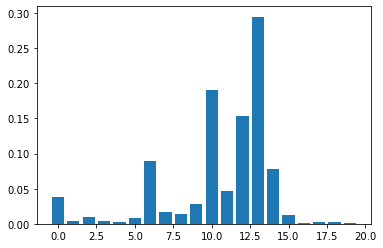

{'Decision Tree Feature': {'Feature 13': 0.2949865915780869}}
the score is 0.9367039352613554 with std of 0.0027456926210832283
auc got added
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      8500
           1       0.81      0.82      0.81      1627

    accuracy                           0.94     10127
   macro avg       0.89      0.89      0.89     10127
weighted avg       0.94      0.94      0.94     10127

                 Predicted Negative  Predicted Positive
Actual Negative                8176                 324
Actual Positive                 289                1338

The FN is  289
The tn is  8176
The tp is  1338
The fp is  324

The precision is:  0.8050541516245487
The recall is:  0.8223724646588814
The f1 score is:  0.8136211614472484
Area under the Receiver Operating Characteristic curve: 0.8921274088000289

The averagve area under the precision-recall curve is: 0.8301729490694707 with std of 0.0

The average accuracy i

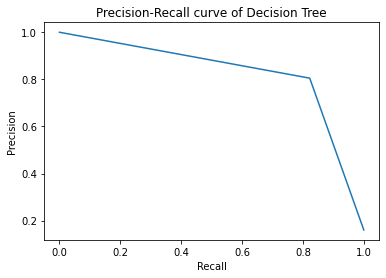


Using the preprocessing data 2
The model running is: Decision Tree


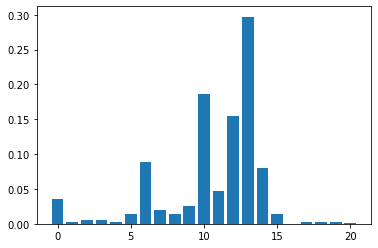

{'Decision Tree Feature': {'Feature 13': 0.2972747427070557}}
the score is 0.9365073793767443 with std of 0.004385528777133952
auc got added
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      8500
           1       0.82      0.80      0.81      1627

    accuracy                           0.94     10127
   macro avg       0.89      0.88      0.89     10127
weighted avg       0.94      0.94      0.94     10127

                 Predicted Negative  Predicted Positive
Actual Negative                8211                 289
Actual Positive                 322                1305

The FN is  322
The tn is  8211
The tp is  1305
The fp is  289

The precision is:  0.8186951066499373
The recall is:  0.8020897357098955
The f1 score is:  0.8103073579633654
Area under the Receiver Operating Characteristic curve: 0.8840448678549477

The averagve area under the precision-recall curve is: 0.8190514596574242 with std of 0.0

The average accuracy is

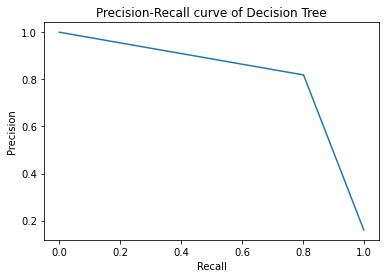


Using the preprocessing data 1
The model running is: SVM Linear


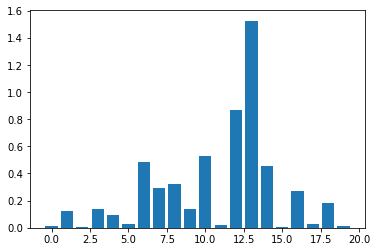

{'Decision Tree Feature': {'Feature 13': 0.2972747427070557}, 'SVM Linear Feature': {'Feature 13': 1.5251336779713256}}
the score is 0.9054998110977053 with std of 0.00371162650379225
auc got added
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      8500
           1       0.78      0.57      0.66      1627

    accuracy                           0.91     10127
   macro avg       0.85      0.77      0.80     10127
weighted avg       0.90      0.91      0.90     10127

                 Predicted Negative  Predicted Positive
Actual Negative                8244                 256
Actual Positive                 696                 931

The FN is  696
The tn is  8244
The tp is  931
The fp is  256

The precision is:  0.7843302443133952
The recall is:  0.5722188076213891
The f1 score is:  0.6616915422885573
Area under the Receiver Operating Characteristic curve: 0.7710505802812828

The averagve area under the precision-recall curve is: 0.7

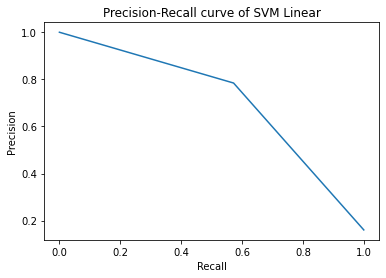


Using the preprocessing data 2
The model running is: SVM Linear


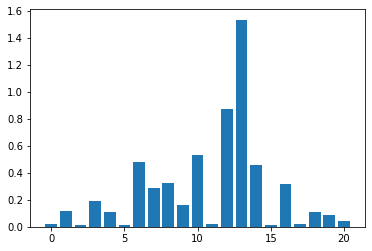

{'Decision Tree Feature': {'Feature 13': 0.2972747427070557}, 'SVM Linear Feature': {'Feature 13': 1.532256859983363}}
the score is 0.9061909253774999 with std of 0.004826558417698995
auc got added
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      8500
           1       0.78      0.57      0.66      1627

    accuracy                           0.91     10127
   macro avg       0.85      0.77      0.80     10127
weighted avg       0.90      0.91      0.90     10127

                 Predicted Negative  Predicted Positive
Actual Negative                8241                 259
Actual Positive                 693                 934

The FN is  693
The tn is  8241
The tp is  934
The fp is  259

The precision is:  0.7829002514668902
The recall is:  0.5740626920712969
The f1 score is:  0.6624113475177306
Area under the Receiver Operating Characteristic curve: 0.7717960519180013

The averagve area under the precision-recall curve is: 0.7

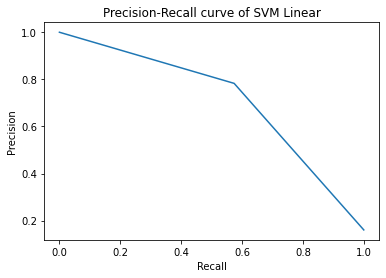


Using the preprocessing data 1
The model running is: BaggingClassifier
{'Decision Tree Feature': {'Feature 13': 0.2972747427070557}, 'SVM Linear Feature': {'Feature 13': 1.532256859983363}}
the score is 0.9612914092111197 with std of 0.0037445529160949923
auc got added
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      8500
           1       0.91      0.85      0.88      1627

    accuracy                           0.96     10127
   macro avg       0.94      0.92      0.93     10127
weighted avg       0.96      0.96      0.96     10127

                 Predicted Negative  Predicted Positive
Actual Negative                8357                 143
Actual Positive                 238                1389

The FN is  238
The tn is  8357
The tp is  1389
The fp is  143

The precision is:  0.9066579634464752
The recall is:  0.8537185003073141
The f1 score is:  0.8793922127255461
Area under the Receiver Operating Characteristic curve: 0.91

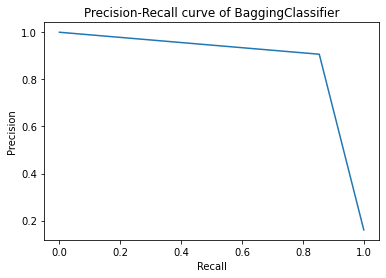


Using the preprocessing data 2
The model running is: BaggingClassifier
{'Decision Tree Feature': {'Feature 13': 0.2972747427070557}, 'SVM Linear Feature': {'Feature 13': 1.532256859983363}}
the score is 0.9611927900259587 with std of 0.001784435846134248
auc got added
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      8500
           1       0.90      0.85      0.87      1627

    accuracy                           0.96     10127
   macro avg       0.93      0.92      0.93     10127
weighted avg       0.96      0.96      0.96     10127

                 Predicted Negative  Predicted Positive
Actual Negative                8342                 158
Actual Positive                 239                1388

The FN is  239
The tn is  8342
The tp is  1388
The fp is  158

The precision is:  0.8978007761966365
The recall is:  0.8531038721573448
The f1 score is:  0.8748818153167349
Area under the Receiver Operating Characteristic curve: 0.917

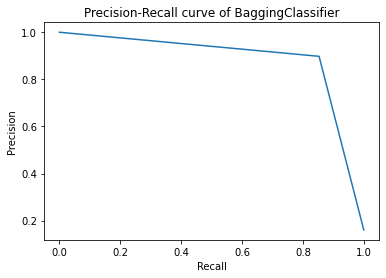


Using the preprocessing data 1
The model running is: RandomForest


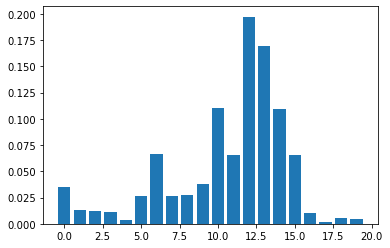

{'Decision Tree Feature': {'Feature 13': 0.2972747427070557}, 'SVM Linear Feature': {'Feature 13': 1.532256859983363}, 'RandomForest Feature': {'Feature 12': 0.19723167368118796}}
the score is 0.9627727444456632 with std of 0.0024316090795687513
auc got added
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      8500
           1       0.93      0.82      0.87      1627

    accuracy                           0.96     10127
   macro avg       0.95      0.91      0.93     10127
weighted avg       0.96      0.96      0.96     10127

                 Predicted Negative  Predicted Positive
Actual Negative                8395                 105
Actual Positive                 286                1341

The FN is  286
The tn is  8395
The tp is  1341
The fp is  105

The precision is:  0.9273858921161826
The recall is:  0.8242163491087892
The f1 score is:  0.8727627725349821
Area under the Receiver Operating Characteristic curve: 0.9059317039661

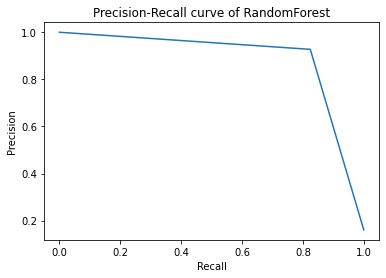


Using the preprocessing data 2
The model running is: RandomForest


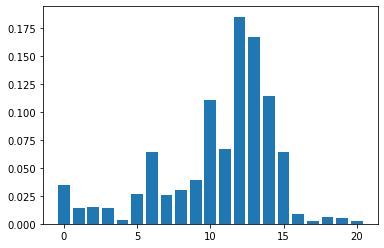

{'Decision Tree Feature': {'Feature 13': 0.2972747427070557}, 'SVM Linear Feature': {'Feature 13': 1.532256859983363}, 'RandomForest Feature': {'Feature 12': 0.18534580159440192}}
the score is 0.9618833193180019 with std of 0.0032144884878774135
auc got added
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      8500
           1       0.94      0.82      0.87      1627

    accuracy                           0.96     10127
   macro avg       0.95      0.90      0.93     10127
weighted avg       0.96      0.96      0.96     10127

                 Predicted Negative  Predicted Positive
Actual Negative                8411                  89
Actual Positive                 297                1330

The FN is  297
The tn is  8411
The tp is  1330
The fp is  89

The precision is:  0.9372797744890768
The recall is:  0.8174554394591272
The f1 score is:  0.8732764281024294
Area under the Receiver Operating Characteristic curve: 0.90349242561191

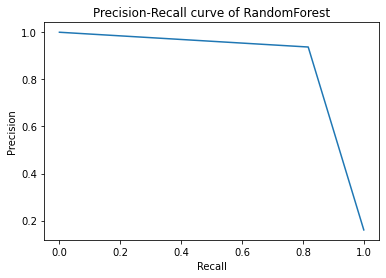


Using the preprocessing data 1
The model running is: Adaboost


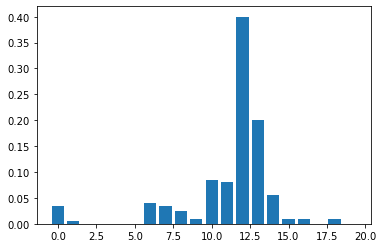

{'Decision Tree Feature': {'Feature 13': 0.2972747427070557}, 'SVM Linear Feature': {'Feature 13': 1.532256859983363}, 'RandomForest Feature': {'Feature 12': 0.18534580159440192}, 'Adaboost Feature': {'Feature 12': 0.4}}
the score is 0.9600081410795461 with std of 0.0023325159014108096
auc got added
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      8500
           1       0.91      0.84      0.87      1627

    accuracy                           0.96     10127
   macro avg       0.94      0.91      0.92     10127
weighted avg       0.96      0.96      0.96     10127

                 Predicted Negative  Predicted Positive
Actual Negative                8363                 137
Actual Positive                 267                1360

The FN is  267
The tn is  8363
The tp is  1360
The fp is  137

The precision is:  0.9084836339345357
The recall is:  0.8358942839582053
The f1 score is:  0.8706786171574904
Area under the Receiver Operat

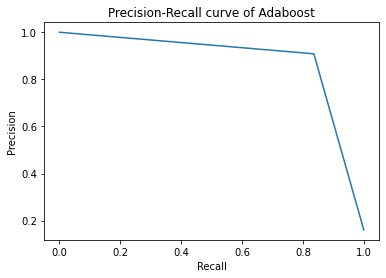


Using the preprocessing data 2
The model running is: Adaboost


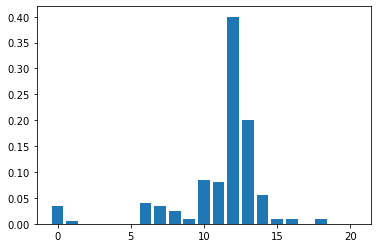

{'Decision Tree Feature': {'Feature 13': 0.2972747427070557}, 'SVM Linear Feature': {'Feature 13': 1.532256859983363}, 'RandomForest Feature': {'Feature 12': 0.18534580159440192}, 'Adaboost Feature': {'Feature 12': 0.4}}
the score is 0.9599093268984682 with std of 0.0039040905223524996
auc got added
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      8500
           1       0.91      0.83      0.87      1627

    accuracy                           0.96     10127
   macro avg       0.94      0.91      0.92     10127
weighted avg       0.96      0.96      0.96     10127

                 Predicted Negative  Predicted Positive
Actual Negative                8367                 133
Actual Positive                 271                1356

The FN is  271
The tn is  8367
The tp is  1356
The fp is  133

The precision is:  0.9106783075889859
The recall is:  0.8334357713583282
The f1 score is:  0.8703465982028242
Area under the Receiver Operat

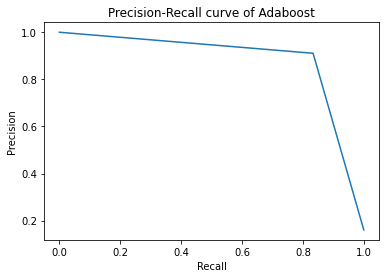

In [12]:
# define the scoring method
scoring = 'accuracy'
number_repeat = 1 #minimum is 1
scores_list = [{},{}]
aucs = [{},{}]

# define models to train
names = ['Decision Tree',
         'SVM Linear',
#          'SVM RBF', 
#          'SVM Sigmoid'
        'BaggingClassifier',
        'RandomForest',
        'Adaboost'
        ]

# build classifiers
classifiers = [
    tree.DecisionTreeClassifier(),
    SVC(kernel='linear', C = 2.0, gamma='scale'),
#     SVC(kernel='rbf', C = 2.0, gamma='scale'),
#     SVC(kernel='sigmoid', C = 2.0, gamma='scale'),
    BaggingClassifier(n_estimators=200, oob_score = True),
    RandomForestClassifier(n_estimators=200, max_features = "sqrt", oob_score = True),
    AdaBoostClassifier(n_estimators=200, learning_rate = 0.3)
]

models = zip(names, classifiers)

# evaluate each model in turn

for name, model in models:
    # Use stratified k-fold cross validation to deal with imbalanced data
    for pre_time in range(2):
        print("Using the preprocessing data", pre_time + 1)
        score_dict = scores_list[pre_time]
        auc_dict = aucs[pre_time]
        print("The model running is: " + name)
        if name != "BaggingClassifier":
            feature_importance(name, model, Xs[pre_time], ys[pre_time])
        high_low_feature(feature_dict)
        kfold = StratifiedKFold(n_splits=5, shuffle=True)
        for i in range(number_repeat):
            kfold = StratifiedKFold(n_splits=5, shuffle=True)
            scores = cross_val_score(model, Xs[pre_time], ys[pre_time], cv = kfold)
            if name not in score_dict:
                score_dict[name] = [] 
            score_dict[name].append((scores.mean(), scores.std()))
            print("the score is", scores.mean(),"with std of", scores.std())
            y_pred = cross_val_predict(model, Xs[pre_time], ys[pre_time], cv=kfold)
            if name not in auc_dict:
                auc_dict[name] = [] 
            precision, recall, thresholds = precision_recall_curve(ys[pre_time], y_pred)
            auc_precision_recall = auc(recall, precision)
            auc_dict[name].append(auc_precision_recall)
            print("auc got added")

        y_pred = cross_val_predict(model, Xs[pre_time], ys[pre_time], cv=kfold)
        print(classification_report(ys[pre_time], y_pred))

        confusion_mat = confusion_matrix(ys[pre_time], y_pred)
        graph = pd.DataFrame(confusion_mat, 
                 columns=['Predicted Negative', 'Predicted Positive'], 
                 index=['Actual Negative', 'Actual Positive'])

        print(graph)
        print()
        fn = confusion_mat[1][0]
        tn = confusion_mat[0][0]
        tp = confusion_mat[1][1]
        fp = confusion_mat[0][1] 

        print("The FN is ", fn)
        print("The tn is ", tn)
        print("The tp is ", tp)
        print("The fp is ", fp)

        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        f1_score = 2 * (precision * recall / (precision + recall))

        print()
        print("The precision is: ", precision)
        print("The recall is: ", recall)
        print("The f1 score is: ", f1_score)

        print('Area under the Receiver Operating Characteristic curve:', str(roc_auc_score(ys[pre_time], y_pred)))
        print()
        auc_precision_recall_mean = sum(auc_dict[name]) / len(auc_dict[name])
        auc_precision_recall_std = statistics.pstdev(auc_dict[name])
        print("The averagve area under the precision-recall curve is:", auc_precision_recall_mean, "with std of", auc_precision_recall_std)
        print()
        temp_list = score_dict[name]
        score_mean = 0
        score_std = 0
        for i in temp_list:
            score_mean += i[0]
            score_std += i[1]
        score_mean /= len(temp_list)
        score_std /= len(temp_list)
        print("The average accuracy is", score_mean, "with the std of",score_std)
        print()
        precision, recall, thresholds = precision_recall_curve(ys[pre_time], y_pred)
        plt.plot(recall, precision)
        plt.title("Precision-Recall curve of " + name)
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.show()
        print()